Gráfico Interativo de Correlação entre Ativos Financeiros

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Lista de ativos
tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOG', 'AMZN']
start_date = '2023-01-01'
end_date = '2025-03-31'

In [8]:
# Baixar os dados
data = yf.download(tickers, start=start_date, end=end_date)
# Check if 'Adj Close' exists, if not try 'Close'
if 'Adj Close' in data.columns:
    data = data['Adj Close']
else:
    # If 'Adj Close' not found, try 'Close'
    if 'Close' in data.columns:
        data = data['Close']
        print("Using 'Close' column instead of 'Adj Close'")
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' column found in the downloaded data.")

[*********************100%***********************]  5 of 5 completed

Using 'Close' column instead of 'Adj Close'


In [9]:
# Calcular retornos logarítmicos
returns = data.pct_change().dropna()

In [10]:
# Calcular correlação
correlation_matrix = returns.corr()

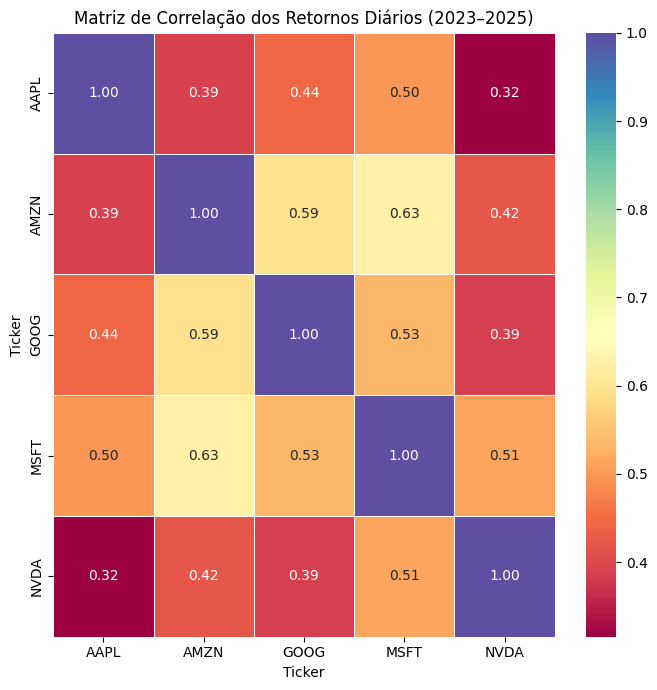

In [21]:
# Plotar o heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação dos Retornos Diários (2023–2025)')
plt.tight_layout()
plt.show()


In [ ]:
A matriz de correlação mostra, como os ativos estão se movimentando juntos — ideal pra análises de portfólio e risco sistêmico.